In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
# reading the file 
df = pd.read_csv(r"06 - Updated.csv")
df.head()

,label,sub_mssg
0,0,job post apple research center content length ...
1,0,query letter for text identification I be post...
2,0,risk a colleague and I be the of risk by our h...
3,0,request book information this morning I be on ...
4,0,call for in syntactic theory content length ca...


In [15]:
# printing the shape of the dataframe
df.shape

(4196, 2)

In [16]:
# storing the sub and message clumn in a variable named corpus
corpus = df['sub_mssg'].values.astype('U')

In [17]:
# definning the count vectorizer
vectorizer = CountVectorizer()
# fitting the corpus and transforming it to vector
X = vectorizer.fit_transform(corpus)

In [18]:
# Corpus after count vectorizer
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# getting the shape of the count vectorizer
l = X.toarray()
l.shape

(4196, 21740)

In [20]:
# now definning the Tf Idf vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus)

In [21]:
type(X)

scipy.sparse.csr.csr_matrix

In [22]:
# getting the feature names
vectorizer.get_feature_names()[144]

c:\Users\Prakhar Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'ait'

In [23]:
X = X.toarray()

In [24]:
type(X)

numpy.ndarray

In [25]:
# getting the shape of the output 
X.shape

(4196, 5000)

In [26]:
X.dtype

dtype('float64')

In [27]:
temp = df['label'].array
temp

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 4196, dtype: int64

In [28]:
temp = np.array(temp)
temp

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
temp.shape

(4196,)

In [30]:
temp = np.reshape(temp,(4196,1))

In [31]:
temp.shape

(4196, 1)

In [32]:
temp

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [33]:
temp = np.hstack([X,temp])

In [34]:
temp.shape

(4196, 5001)

In [35]:
temp = temp.transpose()
temp.shape

(5001, 4196)

In [36]:
# now coverting the output of tf idf to a csv file
np.savetxt('Tf Idf for cpp.csv',temp,delimiter=',')

In [ ]:
# y = df['label'].array
# y = np.array(y)
# y.shape

In [ ]:
# y = y.reshape((1,4196))
# y.shape

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
    train_test_split(X, df['label'].array, test_size=0.3, random_state=5)

In [38]:
x_train.shape

(2937, 5000)

In [39]:
x_test.shape

(1259, 5000)

## Naive Bayes classifier

In [58]:
# #converting sparse matrix to matrix
# x_train = x_train.A
# x_test = x_test.A

In [59]:
model = MultinomialNB().fit(x_train,y_train)

In [60]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
lAcc = []
lModel = []

In [62]:
acc_NB = accuracy_score(y_test,y_pred)
lAcc.append(acc_NB)
lModel.append("Naive Bayes")
acc_NB

0.9896743447180302

# **MLP**

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
model =MLPClassifier(solver='adam',max_iter=300)
model.fit(x_train,y_train)

MLPClassifier(max_iter=300)

In [65]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [66]:
MLPacc = accuracy_score(y_test,y_pred)
lAcc.append(MLPacc)
lModel.append("MLP classifier")
MLPacc

0.9912629070691025

# **SVM**

In [68]:
from sklearn import svm

In [70]:
model = svm.SVC()
model.fit(x_train,y_train)

SVC()

In [71]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [72]:
SVMacc = accuracy_score(y_test,y_pred)
lAcc.append(SVMacc)
lModel.append("SVM")
SVMacc

0.9904686258935663

# **Random forest**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [77]:
RFacc = accuracy_score(y_test,y_pred)
lAcc.append(RFacc)
lModel.append("Random Forest Classifier")
RFacc

0.9809372517871326

# Data visualization

In [79]:
import matplotlib.pyplot as plt

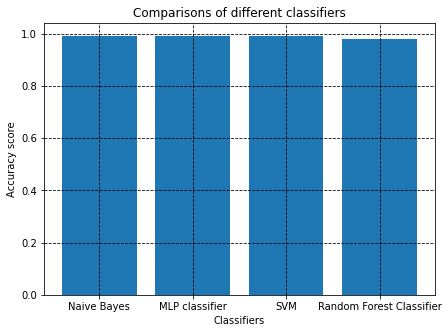

In [91]:
plt.figure(figsize=(7,5))
plt.bar(lModel,lAcc)
plt.grid(linestyle='--',color='black')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy score")
plt.title("Comparisons of different classifiers")
plt.show()